In [124]:
import numpy as np                               
import pandas as pd                             
import matplotlib.pyplot as plt                  
import seaborn as sns                            
#plt.style.use('fivethirtyeight') 
from dateutil.relativedelta import relativedelta 

import warnings                                  
warnings.filterwarnings('ignore')
%matplotlib inline

In [125]:
##Evaluation metrics
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

In [126]:
df_train_raw = pd.read_excel(r"C:\Users\user\Desktop\TRAIN.xlsx")

In [127]:
df_test_raw = pd.read_excel(r"C:\Users\user\Desktop\TEST.xlsx")

In [128]:
df_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26297 entries, 0 to 26296
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  26297 non-null  datetime64[ns]
 1   Load      26297 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 411.0 KB


In [129]:
def weekend_flag(row):
        if row.day_of_week==5 or row.day_of_week==6:
            return 1
        else:
            return 0
        
def data_prep(df):
    df.index = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
    df.Datetime = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')

    df['year'] = df.Datetime.dt.year
    df['month'] = df.Datetime.dt.month
    df['day'] = df.Datetime.dt.day
    df['hour'] = df.Datetime.dt.hour

    df['day_of_week'] = df.Datetime.dt.dayofweek

    df['weekend'] = df.apply(weekend_flag,axis=1)

    df = df.drop(['Datetime'],axis=1)
    
    return df

In [130]:
df_train_all = data_prep(df_train_raw)
df_test = data_prep(df_test_raw)

In [131]:
df_train_all.head()

,Load,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2015-01-01 01:00:00,127765.0,2015,1,1,1,3,0
2015-01-01 02:00:00,128820.0,2015,1,1,2,3,0
2015-01-01 03:00:00,131450.0,2015,1,1,3,3,0
2015-01-01 04:00:00,136430.0,2015,1,1,4,3,0
2015-01-01 05:00:00,141810.0,2015,1,1,5,3,0


In [132]:
print('Train data time period --- Start:',df_train_all.index.min().strftime('%D %H:%M:%S'))
print('Train data time period --- End:',df_train_all.index.max().strftime('%D %H:%M:%S'))   

Train data time period --- Start: 01/01/15 01:00:00
Train data time period --- End: 12/31/17 23:00:00


In [133]:
print('Test data time period --- Start:',df_test.index.min().strftime('%D %H:%M:%S'))
print('Test data time period --- End:',df_test.index.max().strftime('%D %H:%M:%S'))  

Test data time period --- Start: 01/01/18 00:00:00
Test data time period --- End: 04/30/19 23:00:00


Exploratory Data Analysis

In [134]:
df = df_train_all.copy()

In [135]:
df_train = df

In [136]:
df_test[df_test.duplicated()]

,Load,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2018-11-04 02:00:00,71264.5,2018,11,4,2,6,1


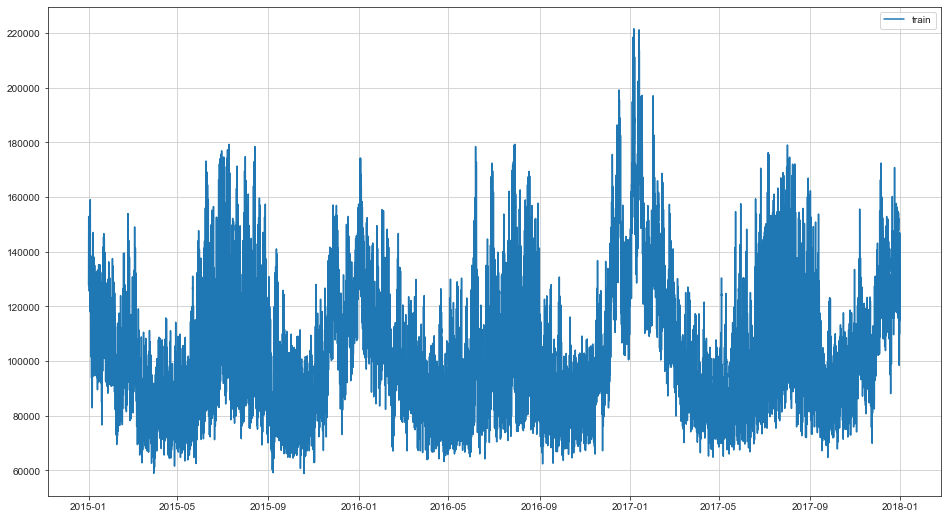

In [137]:
plt.figure(figsize=(16, 9))
plt.plot(df_train['Load'],label='train')
plt.grid(True)
plt.legend()

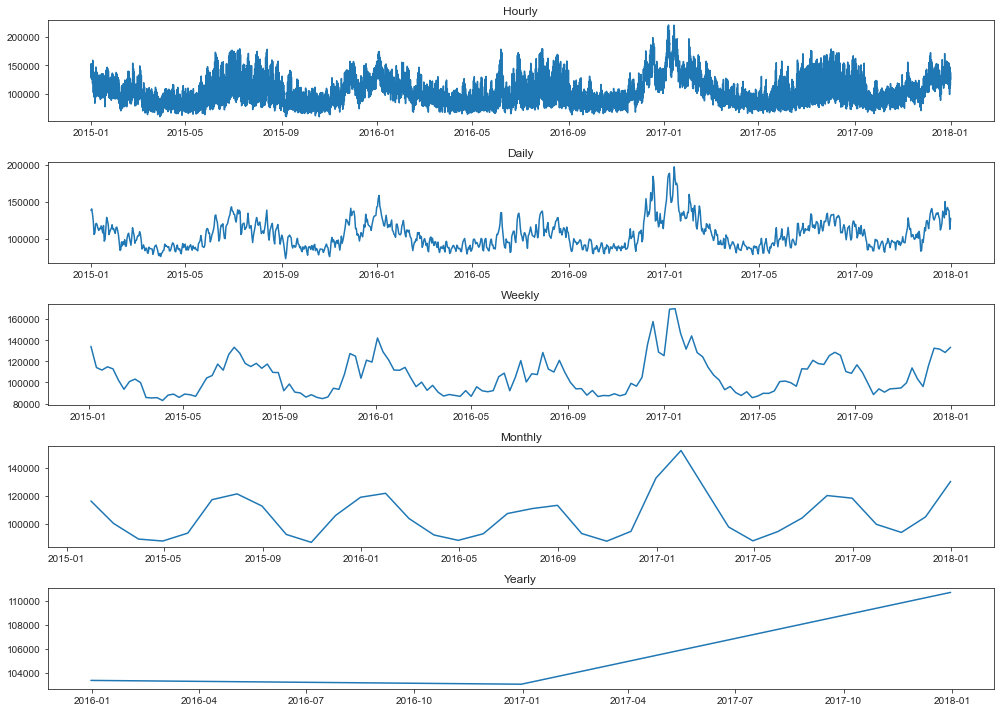

In [138]:
fig,ax = plt.subplots(5,1,figsize=(14,10))
axs = ax.flatten()
axs[0].plot(df_train['Load'])
axs[1].plot(df_train['Load'].resample('D').mean())
axs[2].plot(df_train['Load'].resample('W').mean())
axs[3].plot(df_train['Load'].resample('M').mean())
axs[4].plot(df_train['Load'].resample('Y').mean())
axs[0].set_title('Hourly')
axs[1].set_title('Daily')
axs[2].set_title('Weekly')
axs[3].set_title('Monthly')
axs[4].set_title('Yearly')
plt.tight_layout()
plt.show()

In [139]:
#plt.figure(figsize=(15,5))
#plt.plot(df_train['Load'].resample('D').mean())
#plt.xlim('2015-03','2015-06')
#plt.show()

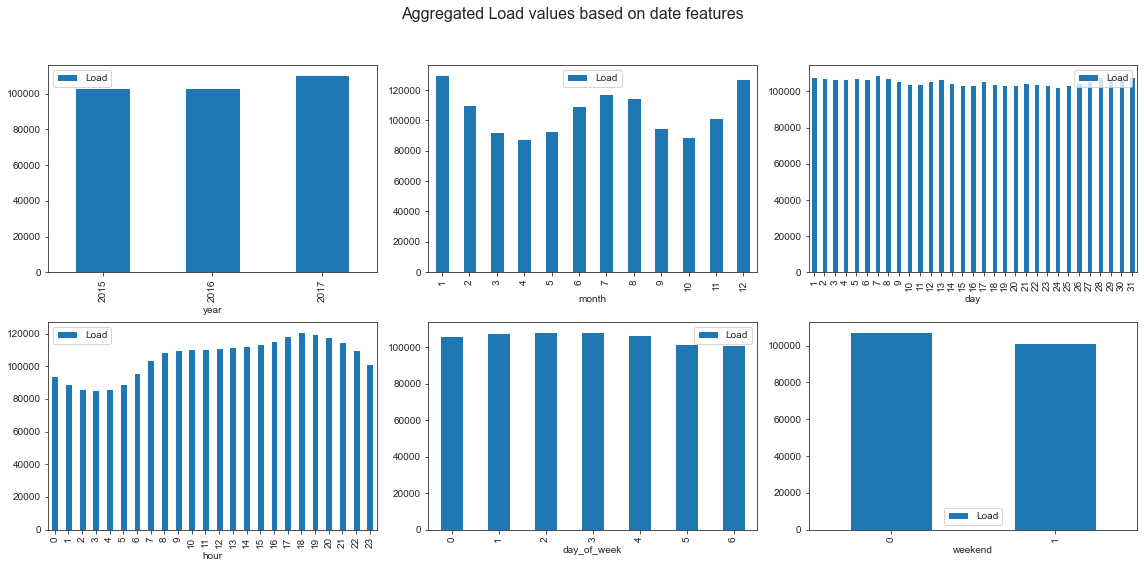

In [140]:
fig,ax = plt.subplots(2,3,figsize=(16, 8))
df_train.groupby(['year']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[0][0])
df_train.groupby(['month']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[0][1])
df_train.groupby(['day']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[0][2])
df_train.groupby(['hour']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[1][0])
df_train.groupby(['day_of_week']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[1][1])
df_train.groupby(['weekend']).agg({'Load':np.mean}).plot(kind='bar',ax=ax[1][2])
fig.suptitle('Aggregated Load values based on date features',size=16)
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [141]:
df = df_train_all.copy()
def fiscal_day(row):
    return str(str(row.year)+str(row.month)+str(row.day))
df['fiscal_day'] = df.apply(fiscal_day,axis=1)
df['daily_sum_count'] = df.groupby(['fiscal_day'])['Load'].transform('sum')
df["hour_weight"] = df.Load / df.daily_sum_count
df["hour_weight"] *= 100

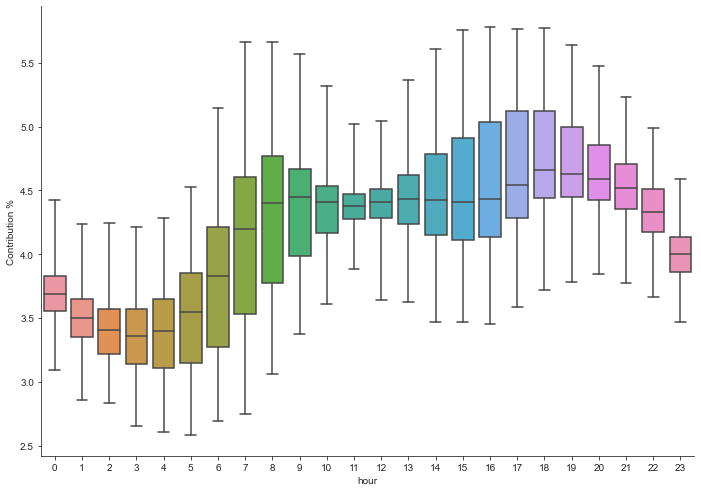

In [142]:
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='hour', y='hour_weight', data=df.sort_values(by=['hour_weight'],ascending=False)[1:],whis=np.inf)
#sns.violinplot(x='hour', y='hour_weight', data=df,whis=np.inf)
#sns.stripplot(x='hour', y='hour_weight', data=df, jitter=True, color=".3")
plt.ylabel("Contribution %")
sns.despine()
plt.show()

In [143]:
df = df_train_all.copy()
df = df.resample('D').mean()
df['week_no'] = df.index.weekofyear
df['week_no'] = df['week_no'].apply(lambda x:str(x).split('.')[0])
df['year'] = df['year'].apply(lambda x: str(x).split('.')[0])#(df_day.groupby("week")["consumption"].transform(sum))
def fiscal_week(row):
    return str(str(row.year)+str(row.week_no))
df['fiscal_week_id'] = df.apply(fiscal_week,axis=1)
df['weekly_sum_count'] = df.groupby(['fiscal_week_id'])['Load'].transform('sum')
df["week_weight"] = df.Load / df.weekly_sum_count
df["week_weight"] *= 100
df["day_name"] = df.index.map(lambda x: x.strftime("%A"))

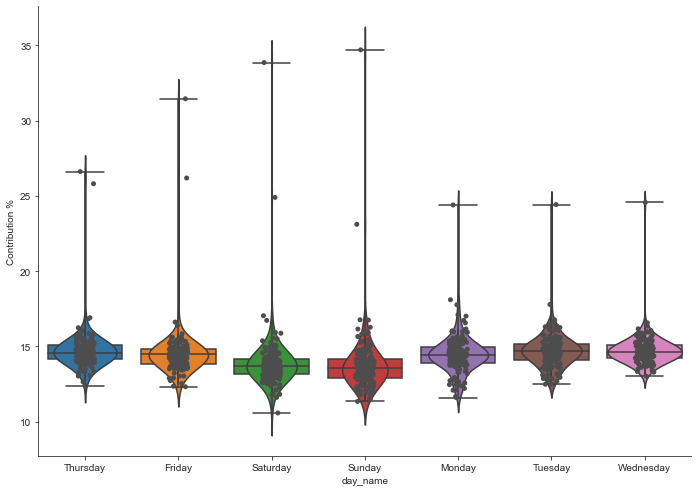

In [144]:
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='day_name', y='week_weight', data=df,whis=np.inf)
sns.violinplot(x='day_name', y='week_weight', data=df,whis=np.inf)
sns.stripplot(x='day_name', y='week_weight', data=df, jitter=True, color=".3")
plt.ylabel("Contribution %")
sns.despine()
plt.show()

In [145]:
df_train = df_train.resample('D').mean()
df_test = df_test.resample('D').mean()
### SPLITING DATA INTO TRAINING AND VALIDATION PART
Train=df_train.loc['2015-01-1':'2017-06-24']
valid=df_train.loc['2017-06-25':'2017-09-25']


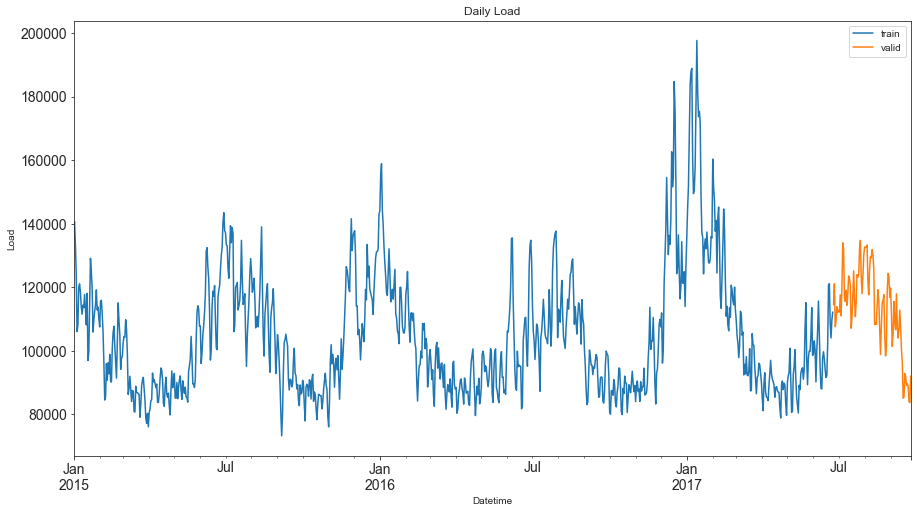

In [146]:
### Now we will look at how the train and validation part has been divided.
Train.Load.plot(figsize=(15,8), title= 'Daily Load', fontsize=14, label='train')
valid.Load.plot(figsize=(15,8), title= 'Daily Load', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Load")
plt.legend(loc='best')
plt.show()

In [147]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

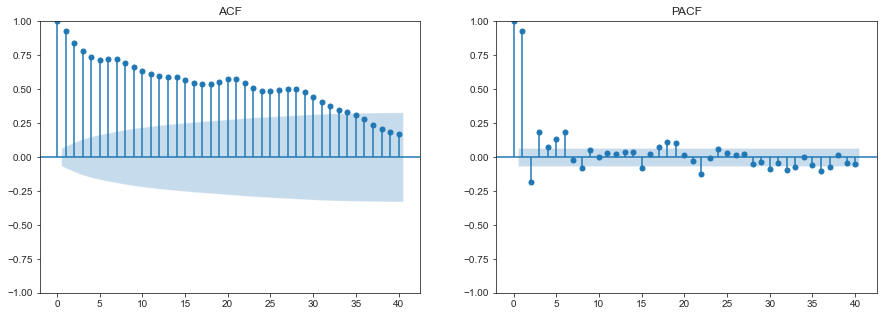

In [148]:
#from statsmodels.tsa.stattools import acf,pacf
import matplotlib.pylab as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = Train['Load']
#acf = acf(data, nlags=40)
#pacf = pacf(data,nlags=40,method='ols')

#plt.stem(acf)
fig,ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(data,lags=40,title="ACF",ax=ax[0])
#plt.show()
plot_pacf(data,lags=40,title="PACF",ax=ax[1])
plt.show()

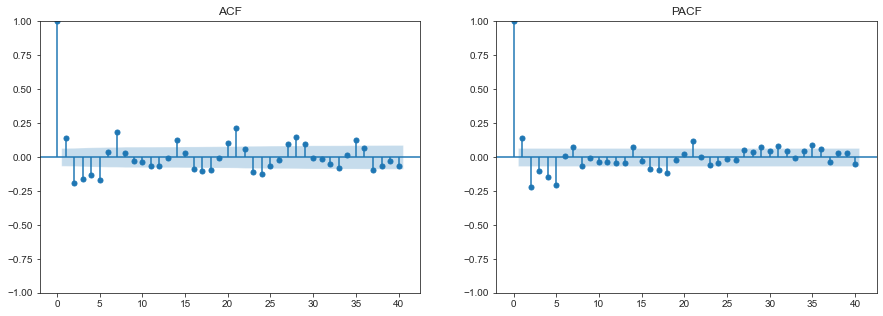

In [149]:
data1 = data.diff(periods=1).values[1:]
fig,ax = plt.subplots(1,2,figsize=(15,5))
plot_acf(data1,lags=40,title="ACF",ax=ax[0])
#plt.show()
plot_pacf(data1,lags=40,title="PACF",ax=ax[1])
plt.show()

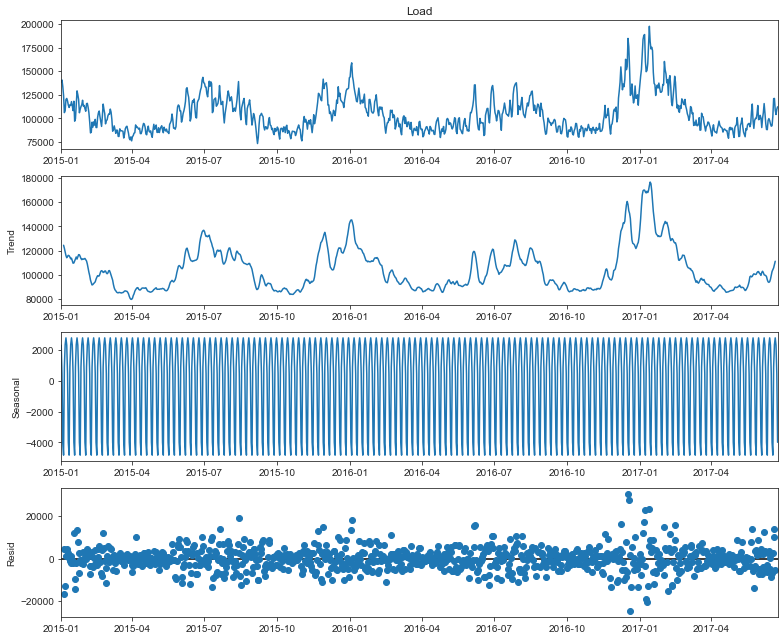

In [150]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
import matplotlib.pyplot as plt 
model=sm.tsa.seasonal_decompose(Train['Load'],model='additive')
fig = model.plot()
plt.show()

In [151]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df_train.Load, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.963372
p-value                           0.038459
#lags Used                       21.000000
Number of Observations Used    1074.000000
Critical Value (1%)              -3.436453
Critical Value (5%)              -2.864235
Critical Value (10%)             -2.568205
dtype: float64


In [152]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(Train['Load'], trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,d=1,max_d=3,
                  max_p=3, max_q=3, max_P=2, max_Q=2, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=2,m=7,
                  error_action='ignore',approximation = False)

 ARIMA(0,1,0)(0,1,0)[7]             : AIC=18932.821, Time=0.06 sec
 ARIMA(0,1,0)(0,1,1)[7]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,2)[7]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(1,1,0)[7]             : AIC=18774.069, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(1,1,2)[7]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=18642.485, Time=0.26 sec
 ARIMA(0,1,0)(2,1,1)[7]             : AIC=inf, Time=1.02 sec
 ARIMA(0,1,0)(2,1,2)[7]             : AIC=inf, Time=2.32 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=18918.418, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.65 sec
 ARIMA(0,1,1)(0,1,2)[7]             : AIC=inf, Time=1.91 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=18768.885, Time=0.31 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=inf, Time=1.12 sec
 ARIMA(0,1,1)(1,1,2)[7]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=18673.331, Ti

In [153]:
print(stepwise_model.aic())

18642.484525850974


In [154]:
stepwise_model.fit(Train['Load'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

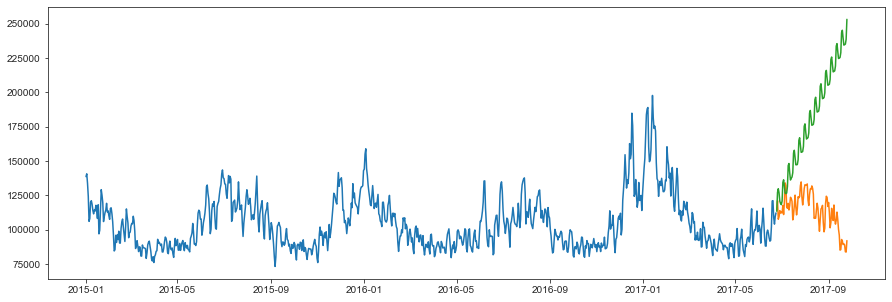

In [155]:
y_hat_avg1 = valid.copy()
y_hat_avg1['auto_arima'] = stepwise_model.predict(len(valid))
plt.figure(figsize=(15,5))
plt.plot(Train['Load'], label='Train')
plt.plot(valid['Load'], label='Valid')
plt.plot(y_hat_avg1['auto_arima'], label='auto_arima')

In [156]:
print("r2_score >>>",r2_score(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))
print("mean_absolute_percentage_error >>>",mean_absolute_percentage_error(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))
print("median_absolute_error >>>",median_absolute_error(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))
print("mean_absolute_error >>>",mean_absolute_error(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))
print("mean_squared_error >>>",mean_squared_error(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))
print("mean_squared_log_error >>>",mean_squared_log_error(y_hat_avg1['Load'], y_hat_avg1['auto_arima']))

r2_score >>> -40.36639486553525
mean_absolute_percentage_error >>> 63.367843787914545
median_absolute_error >>> 52874.52349813862
mean_absolute_error >>> 66909.217813162
mean_squared_error >>> 6544454012.664512
mean_squared_log_error >>> 0.2841318637913481


In [157]:
Train

,Load,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2015-01-01,138573.260870,2015.0,1.0,1.0,12.0,3.0,0.0
2015-01-02,140597.291667,2015.0,1.0,2.0,11.5,4.0,0.0
2015-01-03,133687.291667,2015.0,1.0,3.0,11.5,5.0,1.0
2015-01-04,124077.500000,2015.0,1.0,4.0,11.5,6.0,1.0
2015-01-05,105975.833333,2015.0,1.0,5.0,11.5,0.0,0.0
...,...,...,...,...,...,...,...
2017-06-20,121047.000000,2017.0,6.0,20.0,11.5,1.0,0.0
2017-06-21,108633.083333,2017.0,6.0,21.0,11.5,2.0,0.0
2017-06-22,103962.916667,2017.0,6.0,22.0,11.5,3.0,0.0


In [158]:
y_hat_avg1

,Load,year,month,day,hour,day_of_week,weekend,auto_arima
Datetime,,,,,,,,
2017-06-25,114459.250000,2017.0,6.0,25.0,11.5,6.0,1.0,113347.908881
2017-06-26,121051.500000,2017.0,6.0,26.0,11.5,0.0,0.0,127098.418786
2017-06-27,107523.291667,2017.0,6.0,27.0,11.5,1.0,0.0,129726.396361
2017-06-28,109267.500000,2017.0,6.0,28.0,11.5,2.0,0.0,126726.342099
2017-06-29,113806.333333,2017.0,6.0,29.0,11.5,3.0,0.0,120625.215244
...,...,...,...,...,...,...,...,...
2017-09-21,89605.333333,2017.0,9.0,21.0,11.5,3.0,0.0,234272.667889
2017-09-22,88844.833333,2017.0,9.0,22.0,11.5,4.0,0.0,234601.594129
2017-09-23,83830.083333,2017.0,9.0,23.0,11.5,5.0,1.0,235006.400836


In [159]:
valid

,Load,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,
2017-06-25,114459.250000,2017.0,6.0,25.0,11.5,6.0,1.0
2017-06-26,121051.500000,2017.0,6.0,26.0,11.5,0.0,0.0
2017-06-27,107523.291667,2017.0,6.0,27.0,11.5,1.0,0.0
2017-06-28,109267.500000,2017.0,6.0,28.0,11.5,2.0,0.0
2017-06-29,113806.333333,2017.0,6.0,29.0,11.5,3.0,0.0
...,...,...,...,...,...,...,...
2017-09-21,89605.333333,2017.0,9.0,21.0,11.5,3.0,0.0
2017-09-22,88844.833333,2017.0,9.0,22.0,11.5,4.0,0.0
2017-09-23,83830.083333,2017.0,9.0,23.0,11.5,5.0,1.0
